# PREDIKSI KEGANASAN KANKER PAYUDARA MENGGUNAKAN GAUSSIAN NAIVE BAYES

# Pendahuluan

Kanker payudara merupakan salah satu jenis kanker yang paling umum terjadi pada wanita di seluruh dunia. Meskipun prevalensinya lebih tinggi pada wanita, kanker payudara juga dapat memengaruhi pria meskipun dalam jumlah yang jauh lebih kecil. Kanker payudara dapat dibagi menjadi dua jenis utama: kanker payudara jinak dan kanker payudara ganas. Kanker payudara ganas, yang juga dikenal sebagai kanker payudara invasif, merupakan jenis yang paling serius dan memerlukan perhatian medis yang mendalam.

Kami akan menganalisis data kanker payudara dengan fokus pada pemahaman perbedaan antara kanker payudara jinak dan ganas, sehingga dapat menentukan apakah suatu kanker payudara tersebut merupakan kategori jinak atau ganas dengan menggunakan model yang akan kami buat. Diharapkan dengan model yang kami buat dapat mempermudah paramedis untuk mengidentifikasi kanker payudara. 

# Data Understanding

## Sumber Data

Kami mendapatkan dataset kanker payudara dari UCI dataset (https://archive.ics.uci.edu/dataset/15/breast+cancer+wisconsin+original) 

Breast Cancer Wisconsin adalah dataset kanker payudara yang diperoleh dari University of Wisconsin Hospitals, Madison, Wisconsin dari Dr. William H. Wolberg. 

Dataset diambil berdasarkan referensi berikut :

1. O. L. Mangasarian and W. H. Wolberg: "Cancer diagnosis via linear programming", SIAM News, Volume 23, Number 5, September 1990, pp 1 & 18.
2. William H. Wolberg and O.L. Mangasarian: "Multisurface method of pattern separation for medical diagnosis applied to breast cytology", Proceedings of the National Academy of Sciences, U.S.A., Volume 87, December 1990, pp 9193-9196.
3. O. L. Mangasarian, R. Setiono, and W.H. Wolberg: "Pattern recognition via linear programming: Theory and application to medical diagnosis", in: "Large-scale numerical optimization", Thomas F. Coleman and Yuying Li, editors, SIAM Publications, Philadelphia 1990, pp 22-30.
4. K. P. Bennett & O. L. Mangasarian: "Robust linear programming discrimination of two linearly inseparable sets", Optimization Methods and Software 1, 1992, 23-34 (Gordon & Breach Science Publishers).

## Integrasi Data

untuk mengambil data agar dapat diolah kami perlu untuk menginstall package yang telah disediakan oleh UCI Dataset. Instalasi dilakukan berguna untuk menarik data yang berasal dari UCI dataset agar dapat diolah. 

peritah untuk mengambil data dari UCI dataset dapat di lihat ketika kita menekan tombol import in python pada datase yang kita inginkan dan kita perlu mengikuti perintah tersebut agar data dapat diambil dari UCI dataset.

contoh pengambilan data dari UCI dataset dapat dilihat pada gambar dan perintah berkut

<img src="image-20240502-105006.png" width="" align="" />

In [ ]:
pip install ucimlrepo #untuk install package ucimlrepo


[notice] A new release of pip is available: 23.0.1 -> 24.0
[notice] To update, run: python -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [ ]:
from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
breast_cancer_wisconsin_original = fetch_ucirepo(id=15) 
  
# data (as pandas dataframes) 
data = breast_cancer_wisconsin_original.data.original 
  # menyimpan hasil komputasi ke dalam csv
data.to_csv("breast_cancer.csv", index=True)
print(data.info()) #untuk menampilkan info fitur-fitur yang ada di tabel

print(data.head()) #untuk menampilkan 5 baris pertama

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Sample_code_number           699 non-null    int64  
 1   Clump_thickness              699 non-null    int64  
 2   Uniformity_of_cell_size      699 non-null    int64  
 3   Uniformity_of_cell_shape     699 non-null    int64  
 4   Marginal_adhesion            699 non-null    int64  
 5   Single_epithelial_cell_size  699 non-null    int64  
 6   Bare_nuclei                  683 non-null    float64
 7   Bland_chromatin              699 non-null    int64  
 8   Normal_nucleoli              699 non-null    int64  
 9   Mitoses                      699 non-null    int64  
 10  Class                        699 non-null    int64  
dtypes: float64(1), int64(10)
memory usage: 60.2 KB
None
   Sample_code_number  Clump_thickness  Uniformity_of_cell_size  \
0             100

## Eksplorasi Data

Visualisasi Data

untuk memudahkan kami dalam memahami dataset ,ada baiknya kita ditampilkan dengan visual yang dapat dipahami oleh semua orang,pada visualisasi data kami melakukan perintah berikut agar tampilan data dapat dipahami dengan lebih mudah.

In [ ]:
display(data) #display dataset

,Sample_code_number,Clump_thickness,Uniformity_of_cell_size,Uniformity_of_cell_shape,Marginal_adhesion,Single_epithelial_cell_size,Bare_nuclei,Bland_chromatin,Normal_nucleoli,Mitoses,Class
0,1000025,5,1,1,1,2,1.0,3,1,1,2
1,1002945,5,4,4,5,7,10.0,3,2,1,2
2,1015425,3,1,1,1,2,2.0,3,1,1,2
3,1016277,6,8,8,1,3,4.0,3,7,1,2
4,1017023,4,1,1,3,2,1.0,3,1,1,2
...,...,...,...,...,...,...,...,...,...,...,...
694,776715,3,1,1,1,3,2.0,1,1,1,2
695,841769,2,1,1,1,2,1.0,1,1,1,2
696,888820,5,10,10,3,7,3.0,8,10,2,4
697,897471,4,8,6,4,3,4.0,10,6,1,4


/tmp/ipykernel_34/2163754196.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Class', data=data, palette='viridis')


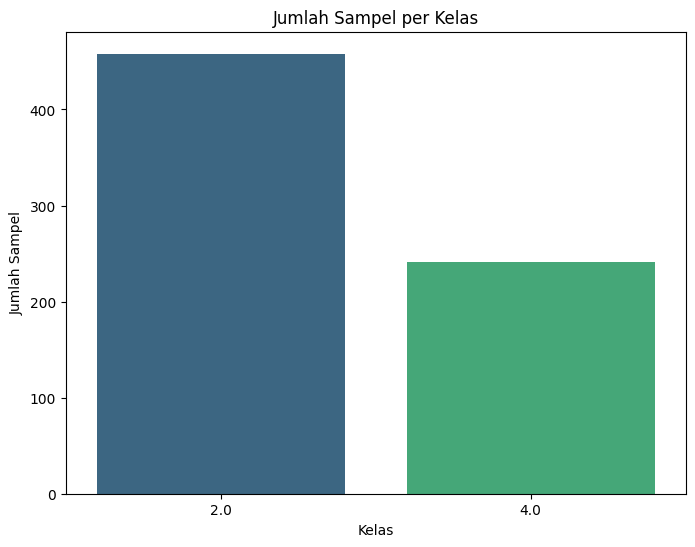

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 6))
sns.countplot(x='Class', data=data, palette='viridis')
plt.title('Jumlah Sampel per Kelas')
plt.xlabel('Kelas')
plt.ylabel('Jumlah Sampel')
plt.show()

<Figure size 1200x1000 with 0 Axes>

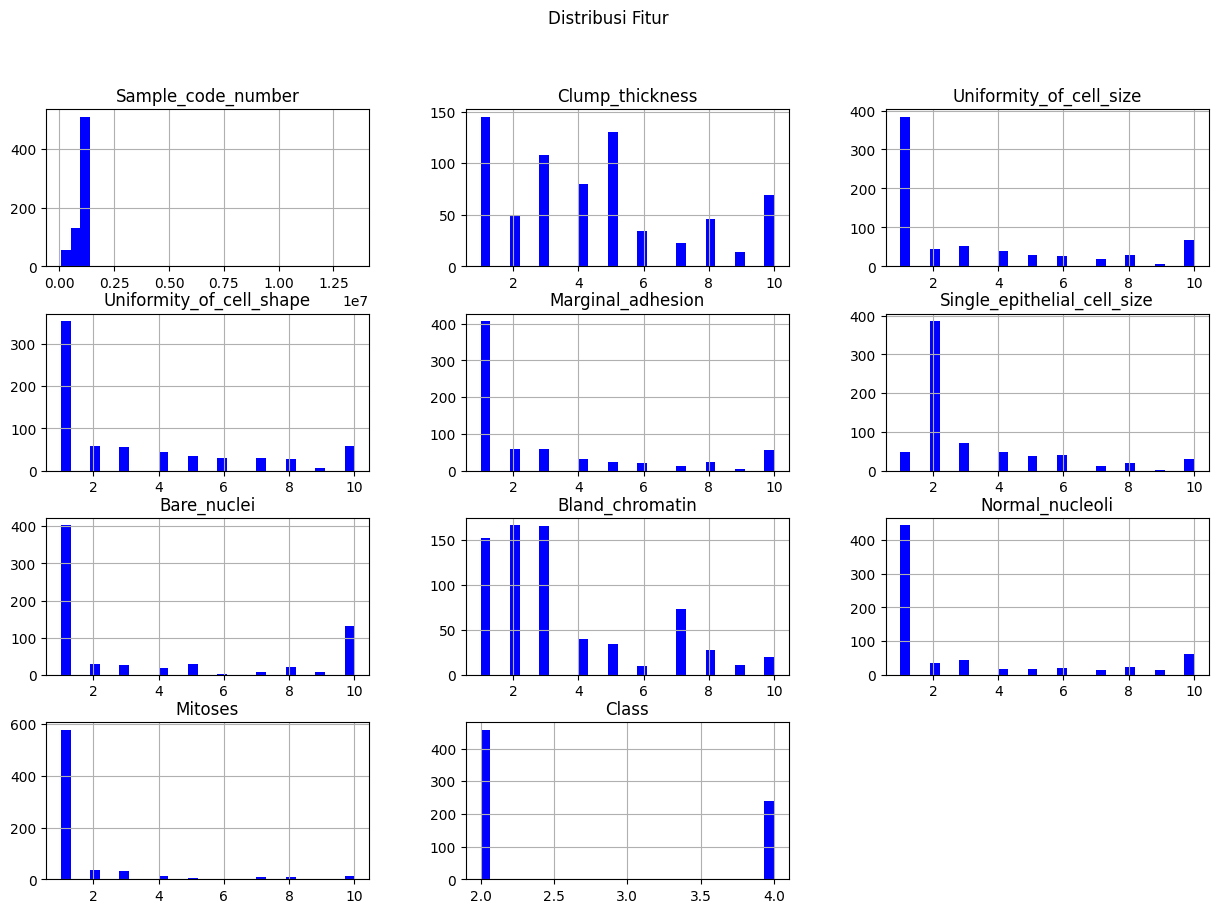

In [ ]:
# Visualisasi distribusi fitur dengan histogram
plt.figure(figsize=(12, 10))
data.hist(bins=30, figsize=(15, 10), color='blue')
plt.suptitle('Distribusi Fitur')
plt.show()

## Struktur Dataset

### Fitur dan Label

fitur merupakan ciri-ciri yang digunakan untuk menentukan klasifikasi suatu data,pada dataset ini fitur yang ada akan berhubungan dan digunakan untuk mengidentifikasi apakah seuatu kanker payudara tersbut temasuk dalam kategori jinak atau ganas.

Fitur pada dataset (9 fitur):

- Clump_thickness(ketebalan gumpalan)

- Uniformity_of_cell_size(keseragamaan ukuran sel)

- Uniformity_of_cell_shape(keseragaman bentuk sel)

- Marginal_adhesion(adhesi marjinal)

- Single_epithelial_cell_size(ukuran sel epitel tunggal)

- Bare_nuclei(inti sel tanpa sitoplasma)

- Bland_chromatin(kromatin)

- Normal_nucleoli(nukleolus normal)

- Mitoses(mitosis)

label merupakan klasifikasi suatu data ,pada data kanker payudara kami diklasifikasikan apakah termasuk kanker jinak atau kanker ganas

Label pada dataset:

Hanya 1 field tapi memiliki 2 type yaitu "2" dan "4"

- 2 : Benign(jinak)

- 4 : Malignant(ganas)

struktur dataset perlu kita ketahui juga untuk mengelola data nantinya,kita perlu megetahui apakah ada berapa data pada dataset,dan ada berapa fitur juga.Karena data dan fitur akan sangat berhubungan dengan model yang akan kita buat nantinya.berikut cara untuk mengetahui struktur data dan penjelasannya.

In [ ]:
data.shape #untuk mengetahui bentuk dataset(baris & kolom)

(699, 11)

Dataset ini memiliki 699 baris dan 11 kolom.

In [ ]:
data.columns #untuk mengetahui kolom-kolom yang ada pada dataset

Index(['Sample_code_number', 'Clump_thickness', 'Uniformity_of_cell_size',
       'Uniformity_of_cell_shape', 'Marginal_adhesion',
       'Single_epithelial_cell_size', 'Bare_nuclei', 'Bland_chromatin',
       'Normal_nucleoli', 'Mitoses', 'Class'],
      dtype='object')

In [ ]:
data.dtypes #untuk mengetahui tipe data dari masing-masing kolom

Sample_code_number               int64
Clump_thickness                  int64
Uniformity_of_cell_size          int64
Uniformity_of_cell_shape         int64
Marginal_adhesion                int64
Single_epithelial_cell_size      int64
Bare_nuclei                    float64
Bland_chromatin                  int64
Normal_nucleoli                  int64
Mitoses                          int64
Class                            int64
dtype: object

Lebih lengkap:

- Sample_code_number: memuat kode sampel/id. Tipe data yang digunakan adalah Numerical bertipe interval.

- Clump_thickness: memuat data ketebalan(besar) gumpalan. Data ini didapat dengan cara mengamati sampel dibawah mikroskop. Tipe data yang digunakan adalah Numerical bertipe interval. Data yang diisikan merupakan angka 1-10 (1 adalah keadaan normal dan 10 adalah keadaan yang paling buruk). 

- Uniformity_of_cell_size: memuat data ukuran sel kanker. Data ini didapat dengan cara mengamati sampel dibawah mikroskop. Tipe data yang digunakan adalah Numerical bertipe interval. Data yang diisikan merupakan angka 1-10 (1 adalah keadaan normal dan 10 adalah keadaan yang paling buruk).

- Uniformity_of_cell_shape: memuat data keabnornamalan bentuk sel kanker. Data ini didapat dengan cara mengamati sampel dibawah mikroskop. Tipe data yang digunakan adalah Numerical bertipe interval. Data yang diisikan merupakan angka 1-10 (1 adalah keadaan normal dan 10 adalah keadaan yang paling buruk).

- Marginal_adhesion: memuat data jumlah penyebaran sel kanker. Data ini didapat dengan cara mengamati sampel dibawah mikroskop. Tipe data yang digunakan adalah Numerical bertipe interval. Data yang diisikan merupakan angka 1-10 (1 adalah keadaan normal dan 10 adalah keadaan yang paling buruk).

- Single_epithelial_cell_size: memuat data ukuran sel epitel tunggal. Data ini didapat dengan cara mengamati sampel dibawah mikroskop. Tipe data yang digunakan adalah Numerical bertipe interval. Data yang diisikan merupakan angka 1-10 (1 adalah keadaan normal dan 10 adalah keadaan yang paling buruk).

- Bare_nuclei: memuat data banyaknya sel yang kehilangan sitoplasma. Data ini didapat dengan cara mengamati sampel pada bidang pandang dengan luas tertentu dibawah mikroskop. Tipe data yang digunakan adalah Numerical bertipe interval. Data yang diisikan merupakan angka 1-10 (1 adalah keadaan normal dan 10 adalah keadaan yang paling buruk).

- Bland_chromatin: memuat data signifikansi perbedaan kromatin pada inti sel. Data ini didapat dengan cara mengamati sampel dibawah mikroskop. Tipe data yang digunakan adalah Numerical bertipe interval. Data yang diisikan merupakan angka 1-10 (1 adalah keadaan normal dan 10 adalah keadaan yang paling buruk).

- Normal_nucleoli: memuat data tingkat kenormalan nukleolus pada inti sel. Data ini didapat dengan cara mengamati sampel dibawah mikroskop. Tipe data yang digunakan adalah Numerical bertipe interval. Data yang diisikan merupakan angka 1-10 (1 adalah keadaan normal dan 10 adalah keadaan yang paling buruk).

- Mitoses: memuat data jumlah sel yang mengalami pembelahan pada unit luas tertentu dari jaringan kanker yang diamati dibawah mikroskop. Data ini didapat dengan cara mengamati sampel dibawah mikroskop. Tipe data yang digunakan adalah Numerical bertipe interval. Data yang diisikan merupakan angka 1-10 (1 adalah keadaan normal dan 10 adalah keadaan yang paling buruk).

- Class memuat apakah data tersebut termasuk kanker payudara benign (2) atau Malignant (4). Tipe data yang digunakan adalah kategorikal bertipe nominal

Penjelasan Skala 1-10
Setiap fitur dinilai pada skala dari 1 hingga 10, dengan nilai yang lebih tinggi menunjukkan karakteristik yang lebih mencolok atau lebih parah, yang cenderung lebih terkait dengan keganasan. Meskipun tidak ada rumus matematis khusus yang digunakan, ahli patologi menggunakan panduan umum berikut untuk memberikan skor:

Clump Thickness (Ketebalan Kelompok)

1-2: Kelompok sel sangat tipis, hampir tidak ada penumpukan.
3-4: Kelompok sel tipis.
5-6: Ketebalan sedang, ada penumpukan tetapi masih relatif seragam.
7-8: Kelompok sel tebal dan tidak seragam.
9-10: Sangat tebal, banyak penumpukan dan ketidakteraturan.

Uniformity of Cell Size (Keseragaman Ukuran Sel)

1-2: Ukuran sel sangat seragam.
3-4: Ukuran sel hampir seragam dengan sedikit variasi.
5-6: Variasi ukuran sel sedang.
7-8: Variasi ukuran sel signifikan.
9-10: Variasi ukuran sel sangat besar.

Uniformity of Cell Shape (Keseragaman Bentuk Sel)

1-2: Bentuk sel sangat seragam.
3-4: Bentuk sel hampir seragam.
5-6: Variasi bentuk sel sedang.
7-8: Bentuk sel bervariasi secara signifikan.
9-10: Bentuk sel sangat bervariasi.

Marginal Adhesion (Adhesi Marginal)

1-2: Sel-sel sangat menempel satu sama lain.
3-4: Adhesi baik dengan sedikit celah.
5-6: Adhesi sedang, beberapa celah terlihat.
7-8: Adhesi lemah, banyak sel yang tidak menempel.
9-10: Hampir tidak ada adhesi, sel-sel terpisah sepenuhnya.

Single Epithelial Cell Size (Ukuran Sel Epitel Tunggal)

1-2: Sel epitel sangat kecil.
3-4: Sel epitel kecil.
5-6: Ukuran sel epitel sedang.
7-8: Sel epitel besar.
9-10: Sel epitel sangat besar.

Bare Nuclei (Inti Tanpa Sitoplasma)

1-2: Hampir tidak ada inti tanpa sitoplasma.
3-4: Beberapa inti tanpa sitoplasma.
5-6: Jumlah inti tanpa sitoplasma sedang.
7-8: Banyak inti tanpa sitoplasma.
9-10: Sangat banyak inti tanpa sitoplasma.

Bland Chromatin (Kromatin Hambar)

1-2: Kromatin sangat seragam dan halus.
3-4: Kromatin hampir seragam.
5-6: Kromatin menunjukkan beberapa ketidakteraturan.
7-8: Kromatin kasar dan tidak teratur.
9-10: Kromatin sangat kasar dan tidak seragam.

Normal Nucleoli (Nukleoli Normal)

1-2: Nukleoli sangat kecil atau tidak terlihat.
3-4: Nukleoli kecil dan sedikit.
5-6: Nukleoli sedang dalam ukuran dan jumlah.
7-8: Nukleoli besar dan banyak.
9-10: Nukleoli sangat besar dan sangat banyak.

Mitoses (Pembelahan Sel)

1-2: Hampir tidak ada pembelahan sel terlihat.
3-4: Beberapa pembelahan sel terlihat.
5-6: Pembelahan sel sedang terlihat.
7-8: Banyak pembelahan sel terlihat.
9-10: Sangat banyak pembelahan sel terlihat.


Metode Penilaian
Ahli patologi menggunakan mikroskop untuk melihat dan mengevaluasi sel-sel dalam sampel jaringan. Penilaian didasarkan pada pengalaman klinis dan standar patologis yang telah ditetapkan untuk masing-masing fitur. Skor diberikan dengan cara yang konsisten untuk memastikan hasil yang dapat diandalkan, meskipun subjektivitas manusia tetap ada.
Penilaian ini tidak didasarkan pada rumus matematis, melainkan pada kriteria kualitatif yang telah distandarisasi dalam bidang patologi. Meskipun ada panduan umum, beberapa variasi antar ahli patologi bisa terjadi karena pengamatan ini memiliki elemen subjektif. Namun, pelatihan dan standar yang ketat membantu meminimalkan variasi ini.

Oleh karena itu dalam menentukan interval 1-10 tidak ada rumus khusus untuk menghitungnya. skornya mencerminkan tingkat keparahan atau ketidaknormalan yang diamati oleh ahli patologi.

In [ ]:
print(data.iloc[:, 1:10].describe())

       Clump_thickness  Uniformity_of_cell_size  Uniformity_of_cell_shape  \
count       699.000000               699.000000                699.000000   
mean          4.417740                 3.134478                  3.207439   
std           2.815741                 3.051459                  2.971913   
min           1.000000                 1.000000                  1.000000   
25%           2.000000                 1.000000                  1.000000   
50%           4.000000                 1.000000                  1.000000   
75%           6.000000                 5.000000                  5.000000   
max          10.000000                10.000000                 10.000000   

       Marginal_adhesion  Single_epithelial_cell_size  Bare_nuclei  \
count         699.000000                   699.000000   683.000000   
mean            2.806867                     3.216023     3.544656   
std             2.855379                     2.214300     3.643857   
min             1.000000  

Penjelasan:

- Count (Jumlah) : Jumlah entri non-null dalam setiap kolom.

- Mean (Rata-rata) : Rata-rata dari setiap kolom.

- Std (Standar Deviasi) : Standar deviasi dari setiap kolom, mengukur seberapa tersebar data di sekitar rata-rata.

- Min (Minimum) : Nilai minimum dalam setiap kolom.

- 25% (Kuartil Pertama) : Nilai kuartil pertama (25th percentile) dari setiap kolom, menandakan nilai di bawahnya 25% dari data.

- 50% (Median) : Nilai median (50th percentile) dari setiap kolom, membagi data menjadi dua bagian yang sama.

- 75% (Kuartil Ketiga) : Nilai kuartil ketiga (75th percentile) dari setiap kolom, menandakan nilai di bawahnya 75% dari data.

- Max (Maksimum) : Nilai maksimum dalam setiap kolom.

ketika ingin mengolah data kami perlu untuk untuk mengetahui berapa jumlah data pada setiap label yang ada,sehingga kami tahu apakah perbandingan banyak data pada masing-masing label dapat diterima.

In [ ]:
data.groupby('Class').size() #untuk mengetahui jumlah masing-masing class

Class
2    458
4    241
dtype: int64

Pada dataset ini terdapat 458 data dengan class benign dan 241 data dengan class malignant.

## Identifikasi Kualitas Data

### Pendeteksian Missing Values

Missing value merupakan data yang hilang pada suatu dataset. Hal ini bisa terjadi oleh beberapa faktor, diantaranya adalah :

- Interviewer recording error terjadi akibat kelalaian petugas pengumpul data (pewawancara), misalnya ada sejumlah pertanyaan yang terlewatkan

- Respondent inability error terjadi akibat ketidakmampuan responden dalam memberikan jawaban akurat, misalnya karena tidak memahami pertanyaan, bosan atau kelelahan (respondent fatigue) akhirnya responden mengosongkan sejumlah pertanyaan atau berhenti mengisi kuesioner di tengah jalan. 

- Unwillingness respondent error terjadi karena responden tidak berkenan memberikan jawaban yang akurat, misalnya pertanyaan soal penghasilan, usia, berat badan, pengalaman melakukan pelanggaran hukum, dll.

Cara penanganan Missing Values :

- Mengabaikan dan membuang missing data

- Estimasi parameter

- Imputasi

Dalam modul kali ini kami akan menangani missing values menggunakan metode imputasi, yang ada 2 metode yaitu menggunakan metode Mean dan menggunakan metode KNN.

Kami lakukan pendeteksian missing values terlebih dahulu pada masing-masing kolom.

In [ ]:
import pandas as pd

# Detect rows with missing values
rows_with_missing = data[data.isnull().any(axis=1)]

# Tampilkan baris dengan nilai yang hilang beserta ID, fitur, dan labelnya
print("Rows with Missing Values:")
print(rows_with_missing)

# Detect missing values
missing_values = data.isnull()

# Hitung nilai yang hilang di setiap kolom
missing_counts = missing_values.sum()

# Display missing value counts
print("Missing Value Counts:")
print(missing_counts)

Rows with Missing Values:
     Sample_code_number  Clump_thickness  Uniformity_of_cell_size  \
23              1057013                8                        4   
40              1096800                6                        6   
139             1183246                1                        1   
145             1184840                1                        1   
158             1193683                1                        1   
164             1197510                5                        1   
235             1241232                3                        1   
249              169356                3                        1   
275              432809                3                        1   
292              563649                8                        8   
294              606140                1                        1   
297               61634                5                        4   
315              704168                4                        6   
321     

dari pendeteksian missing value terlihat bahwa terdapat 16 data yang memiliki missing value pada bagian Bare_nuclei. Berikutnya akan dilakukan imputasi missing value dengan 2 metode yaitu Mean dan KNN

# Prepocessing Data

## Transformasi Data

Dataset diatas sebelumnya nama kelasnya bertipe data kategorikal lalu di transformasi menjadi numerik. Misalnya 2 mereperesentasikan kelas jinak sedangkan 4 merepresentasikan kelas ganas.

dikarenakan data sudah dalam bentuk transformasi, kami akan merubah data ke dalam bentuk sebelum di transformasi

In [ ]:
from ucimlrepo import fetch_ucirepo 
import pandas as pd

# Ambil dataset
breast_cancer_wisconsin_original = fetch_ucirepo(id=15) 

# Data (sebagai dataframe pandas)
data_before = breast_cancer_wisconsin_original.data.original 

# Mengganti label 2 dan 4 menjadi 'Jinak' dan 'Ganas'
data_before['Class'] = data_before['Class'].replace({2: 'Jinak', 4: 'Ganas'})

# Tampilkan 5 baris pertama
print(data_before.head(20))

    Sample_code_number  Clump_thickness  Uniformity_of_cell_size  \
0              1000025                5                        1   
1              1002945                5                        4   
2              1015425                3                        1   
3              1016277                6                        8   
4              1017023                4                        1   
5              1017122                8                       10   
6              1018099                1                        1   
7              1018561                2                        1   
8              1033078                2                        1   
9              1033078                4                        2   
10             1035283                1                        1   
11             1036172                2                        1   
12             1041801                5                        3   
13             1043999                1         

setelah dataset dikembalikan kebentuk sebelum ditransformasi maka berikut adalah cara dalam melakukan transformasi data. data label akan ditransformasi yang sebelumnya "Jinak" dan "Ganas" akan ditransformasi menjadi 2 dan 4. dengan detil yaitu 2 untuk jinak dan 4 untuk ganas

In [ ]:
# Mengganti label 2 dan 4 menjadi 'Jinak' dan 'Ganas'
data_before['Class'] = data_before['Class'].replace({'Jinak':2 , 'Ganas':4 })

# Tampilkan 5 baris pertama
print(data_before.head(20))

    Sample_code_number  Clump_thickness  Uniformity_of_cell_size  \
0              1000025                5                        1   
1              1002945                5                        4   
2              1015425                3                        1   
3              1016277                6                        8   
4              1017023                4                        1   
5              1017122                8                       10   
6              1018099                1                        1   
7              1018561                2                        1   
8              1033078                2                        1   
9              1033078                4                        2   
10             1035283                1                        1   
11             1036172                2                        1   
12             1041801                5                        3   
13             1043999                1         

## Imputasi

### Imputasi Missing Values Mean

setelah missing value terdeteksi, kita perlu untuk mengisi data yang kosong dengan data yang pas agar data dapat digunakan,ada banyak cara untuk mengisi missing value antara lain yaitu dengan menggunkan metode mean,pada tahap ini kita akan melakukan imputasi dengan metode mean.

Untuk langkah-langkah nya sebagai berikut:

1. hitung rata rata setiap kolom pada 'data' lalu simpan hasilnya di suatu variable disini saya mendefinisikan 'mean_values'

2. gunakan metode dari pandas untuk mengisikan / mengantikan value yang kosong / hilang pada dataFrame. (saya disini untuk mengisi value yang kosong dengan menjumlahkan rata-rata dari setiap kolom.

In [ ]:
mean_values = data.mean()
data_filled = data.fillna(mean_values)

print("ini hasil perhitungan mean menggunakan (fillna)")
print(mean_values)
print("")

print("input tiap kolom missing dengan mean")
print("jika output false berarti sudah tidak ada missing value")
print(data_filled.isnull())
print("")
print("")

print("melihat secara tiap karakter")
print(data_filled.isnull().any())
print("")
print("")

missing_values = data_filled.isnull()

# Count missing values in each column
missing_counts = missing_values.sum()

# Display missing value counts
print("Missing Value Couns:")
print(missing_counts) #melihat missing value (jika ada) pada semua fitur

ini hasil perhitungan mean menggunakan (fillna)
Sample_code_number             1.071704e+06
Clump_thickness                4.417740e+00
Uniformity_of_cell_size        3.134478e+00
Uniformity_of_cell_shape       3.207439e+00
Marginal_adhesion              2.806867e+00
Single_epithelial_cell_size    3.216023e+00
Bare_nuclei                    3.544656e+00
Bland_chromatin                3.437768e+00
Normal_nucleoli                2.866953e+00
Mitoses                        1.589413e+00
Class                          2.689557e+00
dtype: float64

input tiap kolom missing dengan mean
jika output false berarti sudah tidak ada missing value
     Sample_code_number  Clump_thickness  Uniformity_of_cell_size  \
0                 False            False                    False   
1                 False            False                    False   
2                 False            False                    False   
3                 False            False                    False   
4             

mengambil dataset Breast Cancer Wisconsin, menyimpannya dalam format CSV:

In [ ]:
data_filled.to_csv("breast_cancer_mean.csv", index=True)

### Imputasi Missing Values KNN

Pada tahapan ini kami akan melakukan imputasi missing value dengan metode KNN dengan perhitungan jarak menggunakan rumus euclidien distance.

Langkah-langkah KNN :
1. Tentukan jumlah tetangga (K) yang akan digunakan untuk pertimbangan penentuan kelas (metode cross validation).
2. Hitung jarak dari data baru ke masing-masing data point di dataset (eulidien distance).
3. Ambil tetangga terdekat menurut K, kemudian hitung rata-ratanya 

<img src="euclidien-20240501-070456.png" width="" align="" />

Sedangkan untuk mencari nilai K terbaik kami menggunakan Cross validation

K-Fold Cross Validation atau lebih sering disebut cross validation adalah salah satu teknik yang populer dipakai dalam evaluasi model ML. Pada cross validation dataset dibagi sebanyak K lipatan. Pada setiap iterasi setiap lipatan akan dipakai satu kali sebagai data uji dan lipatan sisanya dipakai sebagai data latih. Dengan menggunakan cross validation kita akan memperoleh hasil evaluasi yang lebih akurat karena model dievaluasi dengan seluruh data.

Dimensi data tanpa nilai yang hilang: (683, 10)
Nilai K yang akan diuji = [1, 3, 5, 7, 9, 11, 13, 15, 17, 19, 21, 23, 25, 27, 29, 31, 33, 35, 37, 39, 41, 43, 45, 47, 49]


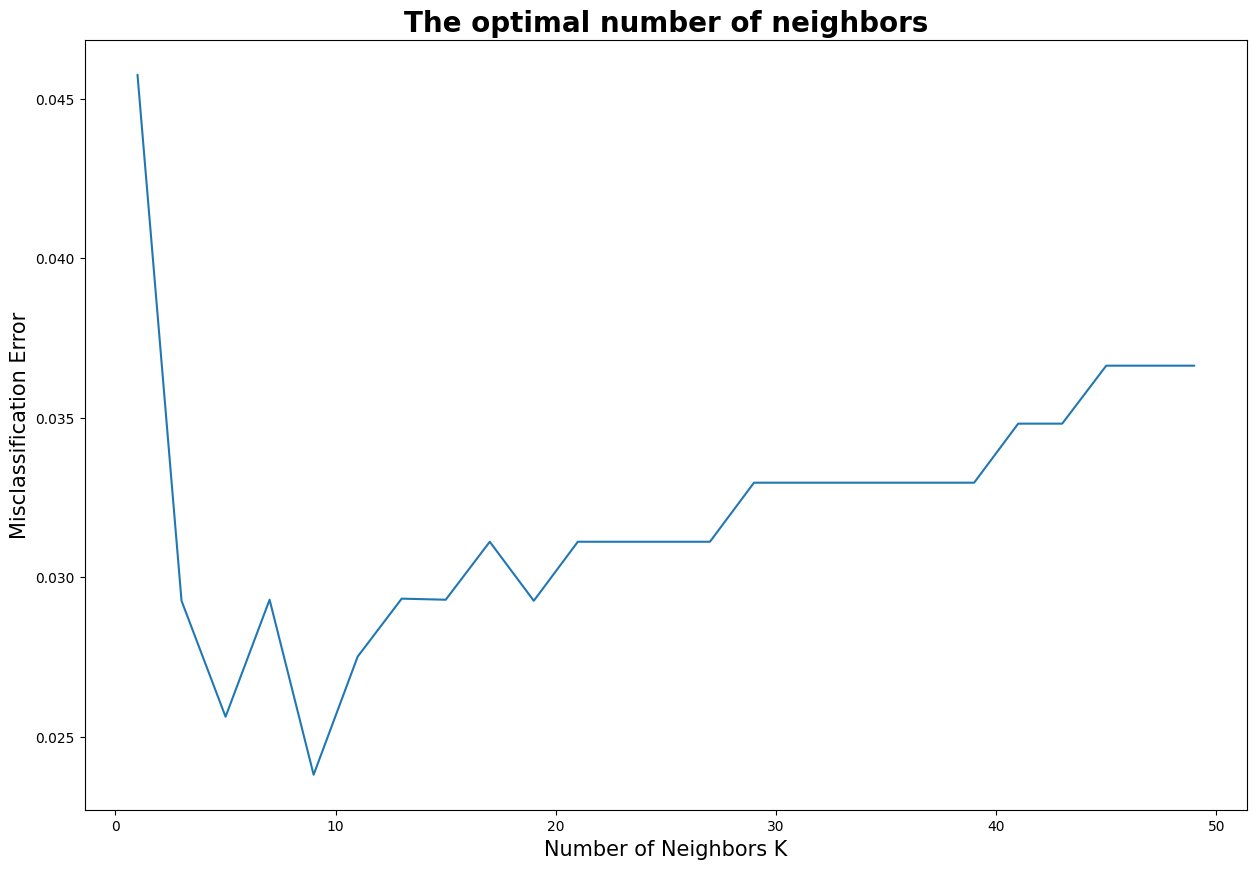

The optimal number of neighbors is 9.


In [ ]:
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

df = pd.read_csv('breast_cancer.csv')
df = df.drop(['Unnamed: 0','Sample_code_number'], axis=1)

# Mengambil semua data yang tidak memiliki nilai yang hilang
data_clean = df.dropna()

# Cetak informasi mengenai dimensi data yang tidak memiliki nilai yang hilang
print("Dimensi data tanpa nilai yang hilang:", data_clean.shape)

# Memisahkan fitur dan label
feature_columns = ["Clump_thickness","Uniformity_of_cell_size","Uniformity_of_cell_shape",
"Marginal_adhesion","Single_epithelial_cell_size", "Bare_nuclei","Bland_chromatin","Normal_nucleoli","Mitoses"]
X = data_clean[feature_columns].values
y = data_clean['Class'].values

# Mengubah label menjadi numerik
le = LabelEncoder()
y = le.fit_transform(y)

# Membagi data menjadi data latih dan data uji
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Membuat list k untuk KNN
k_list = list(range(1, 50, 2))
print(f"Nilai K yang akan diuji = {k_list}")
cv_scores = []

# Melakukan 10-fold cross validation
for k in k_list:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X_train, y_train, cv=10, scoring='accuracy')
    cv_scores.append(scores.mean())

# Menghitung MSE
MSE = [1 - x for x in cv_scores]

plt.figure(figsize=(15, 10))
plt.title('The optimal number of neighbors', fontsize=20, fontweight='bold')
plt.xlabel('Number of Neighbors K', fontsize=15)
plt.ylabel('Misclassification Error', fontsize=15)
sns.set_style("whitegrid")
plt.plot(k_list, MSE)
plt.show()

# Menemukan nilai k terbaik
best_k = k_list[MSE.index(min(MSE))]
print("The optimal number of neighbors is %d." % best_k)

Setelah didapati jumlah K terbaik, maka kita coba cek akurasinya 

In [ ]:
classifier = KNeighborsClassifier(n_neighbors=9)

# Melatih model
classifier.fit(X_train, y_train)

# Memprediksi data uji
y_pred = classifier.predict(X_test)

# Menghitung akurasi
accuracy = accuracy_score(y_test, y_pred) * 100
print('Accuracy of our model is equal ' + str(round(accuracy, 2)) + ' %.')

Accuracy of our model is equal 96.35 %.


setelah didapati akurasi model apabila K berjumlah 9 mendapat hasil 96,35%. maka model tersebut dikatakan baik karena berada di atas 85%. langkah selanjutnya adalah melakukan imputasi dengan KNN

In [ ]:
import pandas as pd
import numpy as np
from sklearn.impute import KNNImputer
from sklearn.preprocessing import MinMaxScaler
from sklearn.impute import KNNImputer

df = pd.read_csv('breast_cancer.csv')
df = df.drop(['Unnamed: 0','Sample_code_number'], axis=1)

# Inisialisasi KNNImputer
imputer = KNNImputer(n_neighbors=9, metric='nan_euclidean') 

# Lakukan imputasi pada data yang memiliki nilai yang hilang
data_imputed = imputer.fit_transform(df)

# Konversi hasil imputasi menjadi DataFrame
data_imputed_df = pd.DataFrame(data_imputed, columns=df.columns)

# Detect missing values
missing_values = data_imputed_df.isnull()

# Count missing values in each column
missing_counts = missing_values.sum()

# Display missing value counts
print("---------------------------Missing Value Counts---------------------------".center(100))
print(missing_counts)

print()
print("---------------------------Hasil data yang sudah diimputasi---------------------------")
# List dari indeks yang ingin ditampilkan
indeks_tampilkan = [23, 40, 139, 145, 158, 164, 235, 249, 275, 292, 294, 297, 315, 321, 411, 617]

# Tampilkan data pada indeks yang diberikan
data_tampil = data_imputed_df.iloc[indeks_tampilkan]
print(data_tampil)

             ---------------------------Missing Value Counts---------------------------             
Clump_thickness                0
Uniformity_of_cell_size        0
Uniformity_of_cell_shape       0
Marginal_adhesion              0
Single_epithelial_cell_size    0
Bare_nuclei                    0
Bland_chromatin                0
Normal_nucleoli                0
Mitoses                        0
Class                          0
dtype: int64

---------------------------Hasil data yang sudah diimputasi---------------------------
     Clump_thickness  Uniformity_of_cell_size  Uniformity_of_cell_shape  \
23               8.0                      4.0                       5.0   
40               6.0                      6.0                       6.0   
139              1.0                      1.0                       1.0   
145              1.0                      1.0                       3.0   
158              1.0                      1.0                       2.0   
164              5

Setelah didapati hasil imputasi dan sudah tidak ada missing value lagi dalam dataset. langkah selanjutnya kami akan menkonversi dataframe hasil imputasi knn ke dalam csv.

In [ ]:
# menyimpan hasil komputasi ke dalam csv
data_imputed_df.to_csv("breast_cancer_knn.csv", index=True)

## Pendeteksian Outlier

Outlier/pencilan merupakan data pada dataset yang menyimpang dari data lainnya,mendeteksi outlier perlu agar data yang kita olah memberikan hasil yang baik pada model yang akan kita buat nantinya.outlier dapat diidentifikasi dan ditangani dengan beberapa cara antara lain yang akan kami gunakan yaitu LOF(Local Outlier Factor).

### Konsep Local Outlier Factor

Outlier adalah titik data yang berbeda atau jauh dari titik data lainnya. Local Outlier Factor (LOF) adalah algoritma yang mengidentifikasi outlier yang ada dalam kumpulan data. Ketika suatu titik dianggap sebagai outlier berdasarkan lingkungan lokalnya, maka titik tersebut disebut local outlier . LOF akan mengidentifikasi outlier dengan mempertimbangkan kepadatan lingkungan. LOF bekerja dengan baik ketika kepadatan data tidak sama di seluruh kumpulan data.

Untuk memahami LOF, kita harus mempelajari beberapa konsep secara berurutan:

- K-distance dan K-neighbors

- Reachability Distance (RD)

- Local Reachability Density (LRD)

- Local Outlier Factor (LOF)

K-distance dan K-neighbors

<img src="k-distance.webp" width="" align="" />

K-distance adalah jarak antara suatu titik, dan merupakan tetangga terdekat Kᵗʰ. Tetangga K yang dilambangkan dengan Nₖ(A) mencakup himpunan titik yang terletak di dalam atau pada lingkaran berjari-jari jarak K. K-tetangga bisa lebih dari atau sama dengan nilai K. Kita akan melihat contohnya. Katakanlah kita mempunyai empat titik A, B, C, dan D. Jika K=2, K-tetangga A adalah C, B, dan D. Di sini, nilai K=2 tetapi ||N₂(A)|| = 3. Oleh karena itu, ||Nₖ(titik)|| akan selalu lebih besar atau sama dengan K.

Reachability distance (RD)

<img src="reachability-distance.webp" width="" align="" />

<img src="reachability-distance-diagram.webp" width="" align="" />

Ini didefinisikan sebagai jarak K maksimum Xj dan jarak antara Xi dan Xj. Ukuran jarak bersifat khusus untuk masalah (Euclidean, Manhattan, dll.) Dalam istilah awam, jika titik Xi terletak di dalam K-tetangga Xj, maka jarak jangkauannya adalah K-jarak Xj (garis biru), jika tidak, jarak jangkauannya adalah jarak antara Xi dan Xj (garis oranye).

Local reachability density (LRD)

<img src="lrd.webp" width="" align="" />

LRD merupakan kebalikan dari rata-rata jarak jangkauan A dari tetangganya. Semakin besar jarak jangkauan rata-rata (yaitu, tetangga jauh dari titik tersebut), semakin sedikit kepadatan titik yang ada di sekitar titik tertentu. Ini menunjukkan seberapa jauh suatu titik dari kelompok titik terdekat. Nilai LRD yang rendah menunjukkan bahwa cluster terdekat berada jauh dari titik.

Local Outlier Factor (LOF)

<img src="lof.webp" width="" align="" />

LRD tiap titik digunakan untuk membandingkan dengan rata-rata LRD K tetangganya. LOF adalah perbandingan rata-rata LRD K tetangga A terhadap LRD A. Jika suatu titik bukan merupakan pencilan (inlier), rasio rata-rata LRD tetangganya kira-kira sama dengan LRD suatu titik (karena kepadatan suatu titik dan tetangganya kira-kira sama). Dalam hal ini, LOF hampir sama dengan 1. Sebaliknya, jika suatu titik merupakan outlier, LRD suatu titik lebih kecil dari rata-rata LRD tetangganya. Maka nilai LOF akan tinggi. Umumnya jika LOF > 1 maka dianggap outlier, namun hal tersebut tidak selalu benar. Katakanlah kita mengetahui bahwa kita hanya memiliki satu outlier dalam data, lalu kita ambil nilai LOF maksimum di antara semua nilai LOF, dan titik yang sesuai dengan nilai LOF maksimum akan dianggap sebagai outlier.

Untuk langkah-langkah perhitungan manual Local Outlier Factor (LOF) yaitu :

1. Menghitung jarak dan menentukan tetangga

2. Menghitung Reachability Distance (RD)

3. Menghitung Local Reachability Distance (LRD)

4. Menghitung Local Outlier Factor (LOF)

### Implementasi Local Outlier Factor dengan Scikit Learn

sedangkan untuk perhitungan melalui code sebagai berikut :

In [ ]:
from sklearn.neighbors import LocalOutlierFactor
from sklearn.metrics import precision_score
import matplotlib.pyplot as plt

# Membuat model LOF
lof = LocalOutlierFactor(n_neighbors=9, contamination=0.03)

data1 = data_imputed_df
data1 = data1.drop(columns=data1.columns[-1])

# Melakukan prediksi outlier untuk setiap fitur
outlier_indices = []
for column in data1.columns:
    # Mengambil nilai fitur
    feature_values = data1[column].values.reshape(-1, 1)
    # Melakukan prediksi outlier
    y_pred = lof.fit_predict(feature_values)
    # Menambahkan indeks outlier ke dalam daftar outlier_indices
    outlier_indices.extend([(i, column) for i, label in enumerate(y_pred) if label == -1])

# Menghilangkan indeks outlier yang duplikat
outlier_indices = list(set(outlier_indices))

# Menampilkan outlier untuk setiap fitur
# for column in data1.columns:
#     plt.scatter(range(len(data1[column])), data1[column], label=column)
#     plt.scatter(outlier_indices, data1[column].iloc[outlier_indices], color='r', label="Outlier")
#     plt.xlabel("Index")
#     plt.ylabel(column)
#     plt.title(f"Outlier Detection for {column}")
#     plt.legend()
#     plt.show()

# Menampilkan indeks outlier yang ditemukan
print("===================================== OUTLIER =====================================")
for i in outlier_indices:
    print(f"outlier ditemukan pada baris => {i[0]}, kolom => {i[1]}")

# Mengumpulkan indeks baris yang mengandung outlier
outlier_row_indices = [index[0] for index in outlier_indices]

# Menampilkan data pada baris yang mengandung outlier
outlier_data = data_imputed_df.iloc[outlier_row_indices]
print("===================================== DATA =====================================")
print("Data pada baris yang mengandung outlier:")
print(outlier_data)


# Mengasumsikan Anda memiliki labels outlier yang sesuai dengan indeks outlier yang Anda temukan
# Misalnya, dalam list ini, nilai 1 menunjukkan outlier, dan 0 menunjukkan bukan outlier
ground_truth_labels = [1 if i in outlier_row_indices else 0 for i in range(len(data_imputed_df))]

# Menghasilkan prediksi outlier berdasarkan outlier_row_indices
predicted_labels = [1 if i in outlier_row_indices else 0 for i in range(len(data_imputed_df))]

# Menghitung akurasi
precision = precision_score(ground_truth_labels, predicted_labels)

print("==================================== AKURASI ====================================")
print(f"akurasi: {precision}")

===================================== OUTLIER =====================================
outlier ditemukan pada baris => 124, kolom => Single_epithelial_cell_size
outlier ditemukan pada baris => 126, kolom => Mitoses
outlier ditemukan pada baris => 302, kolom => Single_epithelial_cell_size
outlier ditemukan pada baris => 98, kolom => Bare_nuclei
outlier ditemukan pada baris => 227, kolom => Uniformity_of_cell_shape
outlier ditemukan pada baris => 491, kolom => Uniformity_of_cell_shape
outlier ditemukan pada baris => 487, kolom => Mitoses
outlier ditemukan pada baris => 23, kolom => Bare_nuclei
outlier ditemukan pada baris => 56, kolom => Bare_nuclei
outlier ditemukan pada baris => 626, kolom => Bare_nuclei
outlier ditemukan pada baris => 617, kolom => Bare_nuclei
outlier ditemukan pada baris => 449, kolom => Uniformity_of_cell_shape
outlier ditemukan pada baris => 262, kolom => Uniformity_of_cell_shape
outlier ditemukan pada baris => 205, kolom => Mitoses
outlier ditemukan pada baris => 465

untuk penanganan outlier tidak kita lakukan dikarenakan data yang terindikasi outlier masih berada di rentang 1-10 (tidak melebihi interval)

lalu untuk akurasi pendeteksian outlier memiliki akurasi nilai 1 atau 100% yang bisa dikatakan sempurna

# Modelling dengan Klasifikasi Gaussian Naive Bayes

Modeling merupakan proses pembuatan dan pengujian model statistik atau matematis yang digunakan untuk menggambarkan dan menganalisis pola atau hubungan dalam data. Tujuan utama dari pemodelan dalam data mining adalah untuk mengidentifikasi pola yang berguna atau prediksi yang akurat dari data yang tersedia.Untuk modelling kali ini bertujuan untuk menentukan class pada suatu data inputan .Data akan dibagi menjadi 2 tipe yaitu data test dan data train dan pemodelan kali ini menggunakan metode Gaussian Naive Bayes.

Kita akan menentukan class dari data yang akan kita inputan apakah termasuk class jinak atau ganas.

cara kalkulasi GNB dapat melalui tahap berikut:

1. Bagi Dataset menjadi data test dan data train

ada dua jenis pembagian rasio dataset yang sering digunakan yaitu 

- 80% data train dan 20% data test

- 70% data train dan 30% data test

Untuk kali ini kita akan menggunkan raiso 80% data train dan 20% data test,namun kalian bisa mengubahnya tergantung situasi dan kondisi dilapangan nantinya

2. Mengghitung Probabilitas pada data train setiap sheet

lakukan perhitungan probabilitas dari masing-masing kelas sesuai dengan jumlah data train pada kelas tersebut kemudian dibagi dengan banyaknya total data train

ini digunakan untuk menghitung Prior

<img src="file/gambar/probabilitas.png" width="" align="" />

3. Menghitung Mean dan Standart dev

hitung mean dan standart deviasi setiap fitur pada setiap kelas di data train kita 

4. membuat inputan

kita akan mengambil satu data acak pada data test kita untuk inputan

5. menghitung Distribusi gausian

lakukan perhitungan dengan rumus distribusi gaussian dengan rumus sebagai berikut

<img src="file/distribusi_gausian_1.png" width="" align="" />

<img src="file/distribusi_gaussian_2.png" width="" align="" />

6. hitung posterior

Setelah didapat semua hasil dari distribusi gaussian, langkah selanjutnya adalah menentukan posteriori-nya. Berikut ini untuk rumusnya :

<img src="file/gambar/posterior.png" width="" align="" />

P(A|Hi) : hasil perkalian setiap fitur pada setiap kelas

P(a) : probabilitas setiap kelas

posteriori = P(A|Hi) * P(a)

7. tentukan maximum posterior

setelah kita menghitung semua posterior maka dapat kita cari mana yang terbesar

data posterior paling besar tersebut yang merupakan akan menjadi class dari data yang kita inputkan 

MODEL

berikut model yang telah kita buat untuk mendeteksi kanker payudara

In [ ]:
import pandas as pd
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from ucimlrepo import fetch_ucirepo 

data = pd.read_csv('breast_cancer_knn.csv')
# Menghapus kolom Id, dikarenakan kurang relevan
# data.drop("unamed column",axis=1,inplace=True)
data.drop("Unnamed: 0",axis=1,inplace=True)

# memisahkan atribut dan label
X = data[['Clump_thickness','Uniformity_of_cell_size','Uniformity_of_cell_shape','Marginal_adhesion','Single_epithelial_cell_size','Bare_nuclei','Bland_chromatin','Normal_nucleoli','Mitoses' ]]
y = data['Class']
 
# Membagi dataset menjadi data latih & data uji
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=0)

# membuat model Gaussian naive bayes
gnb_model = GaussianNB()
 
# Melatih model dengan menggunakan data latih
gnb_model = gnb_model.fit(X_train, y_train)


In [ ]:
y_pred = gnb_model.predict(X_test)

print("=========================== X TRAINING =================================") 
print(X_train)
print("=========================== X TESTING =================================") 
print(X_test)
print("=========================== Y TESTING =================================") 
print(y_test)

=========================== X TRAINING =================================
     Clump_thickness  Uniformity_of_cell_size  Uniformity_of_cell_shape  \
293             10.0                      4.0                       4.0   
62               9.0                     10.0                      10.0   
485              1.0                      1.0                       1.0   
422              4.0                      3.0                       3.0   
332              5.0                      2.0                       2.0   
..               ...                      ...                       ...   
359             10.0                      3.0                       5.0   
192              5.0                      1.0                       1.0   
629              4.0                      1.0                       1.0   
559              5.0                      1.0                       1.0   
684              1.0                      1.0                       1.0   

     Marginal_adhesion  Si

berikut cara menjadikan data train kita ke dalam bentuk csv

In [ ]:
import pandas as pd

# Concatenate X_train and y_train as new column
train_data = pd.concat([X_train, pd.Series(y_train, name='Class')], axis=1)

# Save training data to CSV with tab-separated values
train_data.to_csv('Train_breast_cancer.csv', sep="\t", index=False)

uji coba inputan dengan data test menggunakan model yang kita buat

In [ ]:
print("Data yang akan digunakan adalah")
print(data.iloc[479])
print("data yang diinputkan merupakan class=",gnb_model.predict([[4,8,7,10,4,10,7,5,1]]))

Data yang akan digunakan adalah
Clump_thickness                 4.0
Uniformity_of_cell_size         8.0
Uniformity_of_cell_shape        7.0
Marginal_adhesion              10.0
Single_epithelial_cell_size     4.0
Bare_nuclei                    10.0
Bland_chromatin                 7.0
Normal_nucleoli                 5.0
Mitoses                         1.0
Class                           4.0
Name: 479, dtype: float64
data yang diinputkan merupakan class= [4.]
/shared-libs/python3.9/py/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  warnings.warn(


dari hasil prediksi data tersebut termasuk ke dalam kelas Ganas (4). Jawabannya benar karena data yang diambil merupakan bagian dari data test yang telah dibagi pada model dan termasuk kedalam kelas Ganas (4).

In [ ]:
# Evaluasi Model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, pos_label=2) 
recall = recall_score(y_test, y_pred, pos_label=2)
fscore = f1_score(y_test, y_pred, pos_label=2)

# Menampilkan hasil evaluasi
print(f'Akurasi: {accuracy:.2f}')
print(f'Presisi: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'F-Score: {fscore:.2f}')

Akurasi: 0.96
Presisi: 0.99
Recall: 0.94
F-Score: 0.96


Berdasarkan hasil dari pembuatan model Gaussian Naive Bayes dalam prediksi apakah suatu kanker payudara termasuk jinak atau ganas dengan melatih model menggunakan dataset Breast Cancer Wisconsin telah memperoleh akurasi sebesar 0.96 atau 96%. Akurasi tersebut dapat dikatakan baik karena berada di atas 85% sehingga pelatihan model yang kami buat dapat dipastikan keakuratannya dalam memprediksi jinak atau ganas suatu kanker payudara. 

Dan juga untuk nilai Presisi, Recall dan F-Score yang masing-masing 0.99 atau 99%, 0.94 atau 94%, 0.96 atau 96% 

Akurasi model tersebut dapat mencapai 98% dikarenakan telah kami lakukan pre-processing terlebih dahulu pada datasetnya. mulai dari pendeteksian missing value kemudian dilakukan imputasi missing value tersebut menggunakan mean dan KNN sampai pendeteksian outlier menggunakan Local Outlier Factor. setelah data tersebut sudah bersih dari missing value dan kolom yang tidak terpakai seperti "Sample_code_number" (Id dari sebuah sample) maka dataset siap untuk digunakan pada model Gaussian Naive Bayes.

Referensi jiawei hen; Micheline Kamber; Jian Pei;. (n.d.). Data Mining Concepts and Techniques,halaman 364-370.

# Peningkatan Model

Meskipun pada single model dengan Gaussian Naive Bayes telah mendapatkan akurasi tinggi yaitu 96%. Namun itu masih kurang efektif dikarenakan pada untuk memprediksi hanya dilakukan 1 model saja yaitu dengan model GNB. alih-alih menggunakan 1 model saja akan lebih baik apabila menggunakan banyak model dan nantinya hasil prediksi dari banyak model tersebut dijadikan data baru untuk di masukkan ke dalam meta model sebagai data baru. Untuk melakukan hal tersebut kami akan menggunakan metode ensemble.

Metode ensemble merupakan penggabungan beberapa individual classifier untuk membentuk classifier baru sehingga didapatkan hasil yang lebih akurat. Metode ensemble telah banyak digunakan dalam beberapa penelitian karena terbukti memberikan hasil akurasi yang lebih baik. Dalam metode ensemble, beberapa individual classifier digabungkan dengan tujuan untuk menggabungkan kelebihan dari masing-masing classifier sedemikian rupa sehingga kinerja yang dicapai dalam menyelesaikan tugas menjadi lebih baik. Contoh metode klasifikasi yang umum adalah: bagging, boosting dan stacking. Namun pada kesempatan ini kami hanya menggunakan stacking dan bagging saja untuk peningkatan model.

<img src="ensemble_methods.png" width="" align="" />

## Stacking Classifier (Meta Classifier)

Stacking melibatkan penggabungan beberapa model berbeda dan menggunakan model yang lebih tinggi (meta-model) untuk menggabungkan hasil prediksi dari model-model tersebut. Stacking memungkinkan untuk memanfaatkan kekuatan berbagai jenis model.

<img src="stacking.png" width="" align="" />

pada stacking kami akan menggunakan model KNN dengan nilai tetangga berbeda-beda sebagai base model kemudian hasil prediksi akan dimasukan ke dalam model GNB sebagai meta model (generalizer) untuk prediksi

### Cara kerja stacking 

1. Base Models (Model Dasar):

    - Model-model dasar (base models) pertama-tama dilatih menggunakan data pelatihan.
    - Setelah dilatih, masing-masing model dasar menghasilkan prediksi.
    - Setelah itu gabungkan hasil prediksi sehingga menjadi data baru dan data tersebut akan menjadi data latih dan uji pada meta model

Model A

kami melatih model KNN dengan nilai K=9

In [ ]:
# KNN 1
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

df = pd.read_csv('breast_cancer_knn.csv')
df = df.drop(['Unnamed: 0'], axis=1)

# Memisahkan fitur dan label
feature_columns = ["Clump_thickness","Uniformity_of_cell_size","Uniformity_of_cell_shape",
"Marginal_adhesion","Single_epithelial_cell_size", "Bare_nuclei","Bland_chromatin","Normal_nucleoli","Mitoses"]
X = df[feature_columns].values
y = df['Class'].values

# Membagi data menjadi data latih dan data uji
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

classifier = KNeighborsClassifier(n_neighbors=9)

# TRAIN
classifier.fit(X_train, y_train)

# Memprediksi data uji
xtr1 = classifier.predict(X_train)

# TEST
classifier = KNeighborsClassifier(n_neighbors=3)

# Melatih model
classifier.fit(X_test, y_test)

x_baru=[[4,8,7,10,4,10,7,5,1]]

# Memprediksi data uji
xts1 = classifier.predict(X_test)
xtst_baru=classifier.predict(x_baru)
print ("prediksi untuk data baru: ", xtst_baru)

prediksi untuk data baru:  [4.]


Model B

kami melatih model KNN dengan nilai K=5

In [ ]:
# KNN 2
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

df = pd.read_csv('breast_cancer_knn.csv')
df = df.drop(['Unnamed: 0'], axis=1)

# Memisahkan fitur dan label
feature_columns = ["Clump_thickness","Uniformity_of_cell_size","Uniformity_of_cell_shape",
"Marginal_adhesion","Single_epithelial_cell_size", "Bare_nuclei","Bland_chromatin","Normal_nucleoli","Mitoses"]
X = df[feature_columns].values
y = df['Class'].values

# Membagi data menjadi data latih dan data uji
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

classifier2 = KNeighborsClassifier(n_neighbors=5)

# TRAIN
classifier2.fit(X_train, y_train)

# Memprediksi data uji
xtr2 = classifier2.predict(X_train)

# TEST
classifier2 = KNeighborsClassifier(n_neighbors=5)

# Melatih model
classifier2.fit(X_test, y_test)
x_baru=[[4,8,7,10,4,10,7,5,1]]

# Memprediksi data uji
xts2 = classifier2.predict(X_test)
xtst2_baru=classifier2.predict(x_baru)
print(xtst2_baru)

[4.]


Setelah itu, gabungkan hasil prediksi dari kedua model menjadi sebuah dataset baru

In [ ]:
# MODEL A
combined_df = pd.DataFrame({
    'X1': xtr1,
    'X2': xtr2,
    'Y': y_train
})

# Save the DataFrame to a CSV file
combined_df.to_csv('combine_train.csv', index=False)

In [ ]:
# MODEL B
combined_df = pd.DataFrame({
    'X1': xts1,
    'X2': xts2,
    'Y': y_test
})

# Save the DataFrame to a CSV file
combined_df.to_csv('combine_test.csv', index=False)

In [ ]:
df = pd.read_csv('combine_train.csv')
df.head()

,X1,X2,Y
0,4.0,4.0,4.0
1,4.0,4.0,4.0
2,2.0,2.0,2.0
3,2.0,2.0,2.0
4,2.0,2.0,2.0


In [ ]:
df2 = pd.read_csv('combine_test.csv')
df2.head()

,X1,X2,Y
0,2.0,2.0,2.0
1,2.0,2.0,2.0
2,4.0,4.0,2.0
3,2.0,2.0,2.0
4,4.0,4.0,4.0


2. Generalizer (Meta-Model):

    - Prediksi dari model-model dasar ini kemudian digunakan sebagai fitur (input) untuk melatih model baru yang disebut generalizer atau meta-model.
    - Generalizer ini akan belajar dari kombinasi prediksi-prediksi model dasar untuk membuat keputusan akhir yang lebih baik.

In [ ]:
# GNB
import pandas as pd
import numpy as np
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

# Menggabungkan prediksi dari kedua model KNN sebagai fitur baru
f_meta = np.column_stack((xtr1, xtr2))
X_test = np.column_stack((xts1, xts2))

# Inisialisasi dan pelatihan meta-classifier Naive Bayes
meta_classifier = GaussianNB()
meta_classifier.fit(f_meta, y_train)
predict = meta_classifier.predict(X_test)

print(classification_report(predict, y_test))
print(meta_classifier.predict([[4,4]]))

              precision    recall  f1-score   support

         2.0       0.98      0.98      0.98        85
         4.0       0.96      0.96      0.96        55

    accuracy                           0.97       140
   macro avg       0.97      0.97      0.97       140
weighted avg       0.97      0.97      0.97       140

[4.]


### Implementasi stacking dengan scikit-learn

setelah kita mengetahui proses dari stacking classifier untuk meningkatkan model secara manual, berikutnya kami akan menggunakan bantuan library untuk membantu melatih model dasar, karena kami tidak mungkin melatih model dasar satu persatu, karena kami akan menggunakan 20 model knn sebagai model dasar dengan pembeda adalah nilai K. Dan nantinya prediksi 20 model tersebut akan dimasukkan ke dalam model gaussian naive bayes.

Accuracy of knn1: 0.9786
Accuracy of knn2: 0.9714
Accuracy of knn3: 0.9786
Accuracy of knn4: 0.9786
Accuracy of knn5: 0.9786
Accuracy of knn6: 0.9714
Accuracy of knn7: 0.9714
Accuracy of knn8: 0.9643
Accuracy of knn9: 0.9643
Accuracy of knn10: 0.9643
Accuracy of knn11: 0.9643
Accuracy of knn12: 0.9643
Accuracy of knn13: 0.9643
Accuracy of knn14: 0.9643
Accuracy of knn15: 0.9643
Accuracy of knn16: 0.9643
Accuracy of knn17: 0.9643
Accuracy of knn18: 0.9643
Accuracy of knn19: 0.9643
Accuracy of knn20: 0.9643


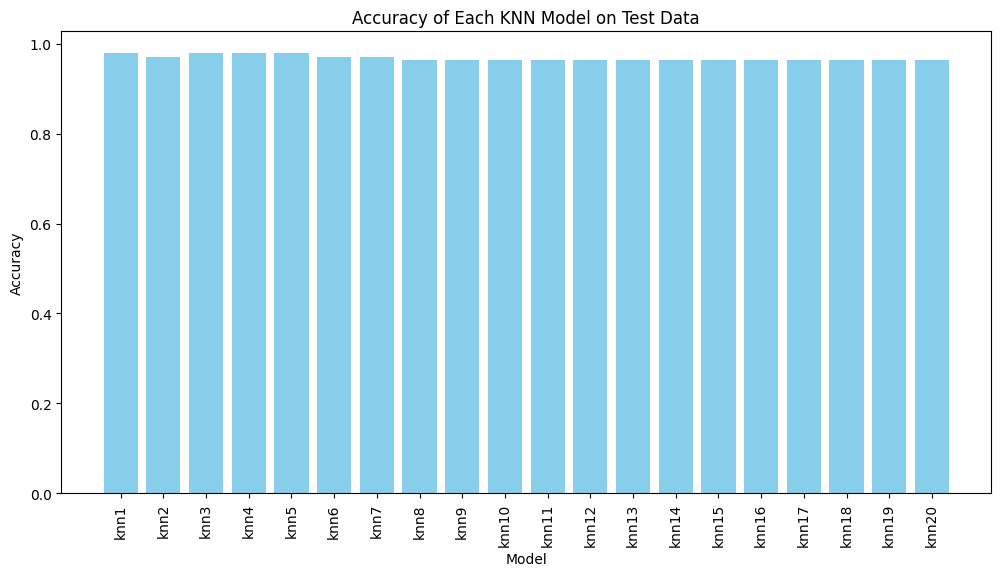

Prediction of knn1: 4.0
Prediction of knn2: 4.0
Prediction of knn3: 4.0
Prediction of knn4: 4.0
Prediction of knn5: 4.0
Prediction of knn6: 4.0
Prediction of knn7: 4.0
Prediction of knn8: 4.0
Prediction of knn9: 4.0
Prediction of knn10: 4.0
Prediction of knn11: 4.0
Prediction of knn12: 4.0
Prediction of knn13: 4.0
Prediction of knn14: 4.0
Prediction of knn15: 4.0
Prediction of knn16: 4.0
Prediction of knn17: 4.0
Prediction of knn18: 4.0
Prediction of knn19: 4.0
Prediction of knn20: 4.0


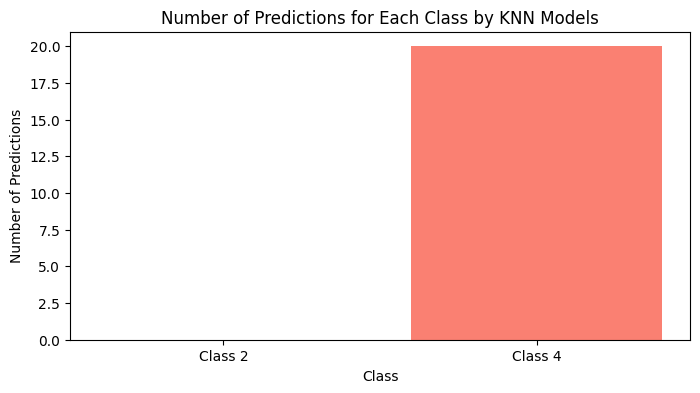


Prediction for X_new: 4.0

Overall Stacking Classifier Performance:
Accuracy: 0.9714


In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.ensemble import StackingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
import matplotlib.pyplot as plt

# Load dataset
df = pd.read_csv('breast_cancer_knn.csv')
df = df.drop(['Unnamed: 0'], axis=1)

# Separate features and labels
feature_columns = ["Clump_thickness", "Uniformity_of_cell_size", "Uniformity_of_cell_shape",
                   "Marginal_adhesion", "Single_epithelial_cell_size", "Bare_nuclei",
                   "Bland_chromatin", "Normal_nucleoli", "Mitoses"]
X = df[feature_columns].values
y = df['Class'].values

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Create list of estimators for StackingClassifier
estimators = [('knn' + str(i // 3), KNeighborsClassifier(n_neighbors=i)) for i in range(3, 63, 3)]

# Initialize StackingClassifier with GaussianNB as final estimator
clf = StackingClassifier(
    estimators=estimators, final_estimator=GaussianNB()
)

# Train StackingClassifier
clf.fit(X_train, y_train)

# Evaluate accuracy for each KNN model and store the results
accuracies = []
for name, estimator in estimators:
    estimator.fit(X_train, y_train)
    y_pred = estimator.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(f"Accuracy of {name}: {accuracy:.4f}")
    accuracies.append(accuracy)

# Plotting the accuracy of each KNN model
model_names = [name for name, _ in estimators]
plt.figure(figsize=(12, 6))
plt.bar(model_names, accuracies, color='skyblue')
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.title('Accuracy of Each KNN Model on Test Data')
plt.xticks(rotation=90)
plt.show()

# Evaluate predictions for new data point by each KNN model
X_new = [[4,8,7,10,4,10,7,5,1]]
predictions = {}
for name, estimator in estimators:
    pred = estimator.predict(X_new)[0]
    predictions[name] = pred
    print(f"Prediction of {name}: {pred}")

# Counting predictions for each class
count_class_2 = sum(1 for pred in predictions.values() if pred == 2)
count_class_4 = sum(1 for pred in predictions.values() if pred == 4)

# Plotting the number of predictions for each class
plt.figure(figsize=(8, 4))
plt.bar(['Class 2', 'Class 4'], [count_class_2, count_class_4], color=['lightgreen', 'salmon'])
plt.xlabel('Class')
plt.ylabel('Number of Predictions')
plt.title('Number of Predictions for Each Class by KNN Models')
plt.show()

# Predict for new data using StackingClassifier
prediction = clf.predict(X_new)

print(f'\nPrediction for X_new: {prediction[0]}')

# Evaluate overall performance of the stacking classifier
avg_acc = clf.score(X_test, y_test)
print(f'\nOverall Stacking Classifier Performance:')
print(f'Accuracy: {avg_acc:.4f}')

# Obtain predictions from the model
y_pred = clf.predict(X_test)


## Bagging (Bootstrap Aggregating)

Bagging melibatkan pembuatan beberapa subset dari data pelatihan dengan penggantian (bootstrap) dan melatih model yang berbeda pada setiap subset. Kemudian, hasil prediksi dari model-model ini diambil rata-rata (untuk regresi) atau diambil mayoritas (untuk klasifikasi).

<img src="bagging.png" width="" align="" />

Metode bagging bertujuan untuk mengatasi variasi dan overfitting dalam model-machine learning. Bagging melibatkan langkah-langkah berikut:

1. Mengambil dataset pelatihan awal yang dimiliki.

2. Membuat beberapa set data pelatihan yang berbeda dengan cara mengambil sampel secara acak dari dataset awal. Setiap set data ini mungkin memiliki beberapa data yang sama dan beberapa yang berbeda.

3. Model yang sama (classifier) diterapkan pada setiap set data pelatihan ini dan menghasilkan prediksi masing-masing.

4. Hasil prediksi dari semua classifier digabungkan.

Metode bagging membantu mengurangi variabilitas dalam prediksi karena setiap set data pelatihan memiliki variasi yang berbeda. Variasi ini membuat model lebih stabil dan lebih baik kinerjanya daripada hanya menggunakan satu set data pelatihan saja.

pada bagging kami menggunakan 20 gaussian naive bayes yang menerima subset berbeda satu sama lain 

Data yang baru yang akan diprediksi
   Clump_thickness  Uniformity_of_cell_size  Uniformity_of_cell_shape  \
0                4                        8                         7   

   Marginal_adhesion  Single_epithelial_cell_size  Bare_nuclei  \
0                 10                            4           10   

   Bland_chromatin  Normal_nucleoli  Mitoses  
0                7                5        1  

Estimator 1 accuracy : 0.9429
Estimator 1 memprediksi : 4

Estimator 2 accuracy : 0.9571
Estimator 2 memprediksi : 4

Estimator 3 accuracy : 0.8357
Estimator 3 memprediksi : 4

Estimator 4 accuracy : 0.8929
Estimator 4 memprediksi : 4

Estimator 5 accuracy : 0.9071
Estimator 5 memprediksi : 4

Estimator 6 accuracy : 0.9500
Estimator 6 memprediksi : 4

Estimator 7 accuracy : 0.9643
Estimator 7 memprediksi : 4

Estimator 8 accuracy : 0.9571
Estimator 8 memprediksi : 4

Estimator 9 accuracy : 0.8714
Estimator 9 memprediksi : 4

Estimator 10 accuracy : 0.9571
Estimator 10 memprediksi : 

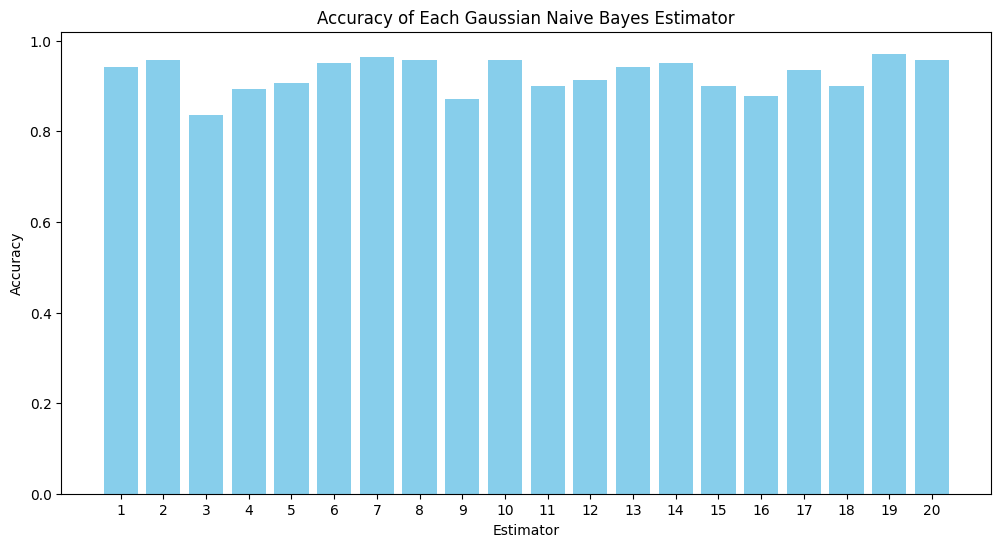

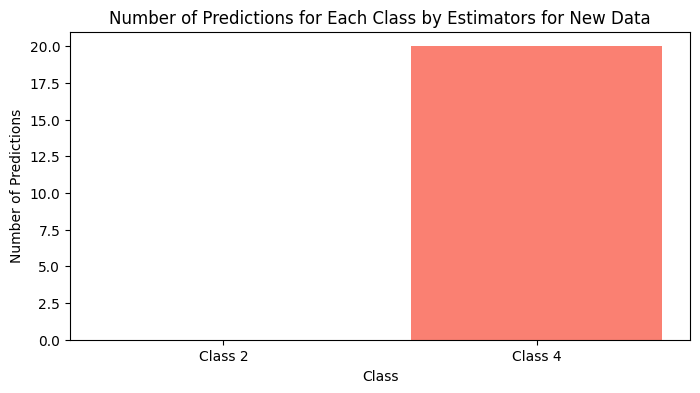

In [ ]:
import pandas as pd
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
import numpy as np

# Memuat data
data = pd.read_csv('breast_cancer_knn.csv')

# Menghapus kolom yang tidak relevan
data.drop("Unnamed: 0", axis=1, inplace=True)

# Memisahkan atribut dan label
X = data[['Clump_thickness','Uniformity_of_cell_size','Uniformity_of_cell_shape','Marginal_adhesion','Single_epithelial_cell_size','Bare_nuclei','Bland_chromatin','Normal_nucleoli','Mitoses']]
y = data['Class']

# Membagi dataset menjadi data latih dan data uji
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Parameter bagging
n_estimators = 20
n_samples = int(len(X_train) / n_estimators)

# Inisialisasi list untuk menyimpan model dan akurasi
estimators = []
accuracies = []
pred = []

# Data baru yang ingin diprediksi
X_new = pd.DataFrame([[4,8,7,10,4,10,7,5,1]], columns=['Clump_thickness','Uniformity_of_cell_size','Uniformity_of_cell_shape','Marginal_adhesion','Single_epithelial_cell_size','Bare_nuclei','Bland_chromatin','Normal_nucleoli','Mitoses'])
print("Data yang baru yang akan diprediksi")
print(X_new)
print()
np.random.seed(0)

# Membuat model Gaussian Naive Bayes untuk setiap subset
for i in range(n_estimators):
    # Membuat bootstrap sample
    bootstrap_indices = np.random.randint(0, len(X_train), n_samples)
    X_train_bootstrap = X_train.iloc[bootstrap_indices]
    y_train_bootstrap = y_train.iloc[bootstrap_indices]
    
    # Melatih model
    gnb_model = GaussianNB()
    gnb_model.fit(X_train_bootstrap, y_train_bootstrap)
    estimators.append(gnb_model)
    
    # Evaluasi model    
    bebas = gnb_model.predict(X_new)
    pred.append(bebas[0])  # Mengambil nilai prediksi dan menyimpannya di list pred
    y_pred = gnb_model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    accuracies.append(accuracy)
    print(f"Estimator {i + 1} accuracy : {accuracy:.4f}")
    print(f"Estimator {i + 1} memprediksi : {int(bebas[0])}")
    print()

# Majority vote untuk prediksi data baru
pred_majority_vote = np.bincount(pred).argmax()
print(f"Majority vote prediction for new data: {pred_majority_vote}")

# Menghitung jumlah dari masing-masing kelas dalam pred
class_counts = np.bincount(pred, minlength=5) #5 karena kelas ada 4
print(f"Jumlah prediksi kelas 2: {class_counts[2] if len(class_counts) > 2 else 0}")
print(f"Jumlah prediksi kelas 4: {class_counts[4] if len(class_counts) > 4 else 0}")

# Menghitung rata-rata akurasi dari semua estimators
average_accuracy = np.mean(accuracies)
print(f"Average accuracy of all estimators: {average_accuracy:.4f}")

# Plot accuracy untuk tiap estimator
plt.figure(figsize=(12, 6))
plt.bar(range(1, n_estimators + 1), accuracies, color='skyblue')
plt.xlabel('Estimator')
plt.ylabel('Accuracy')
plt.title('Accuracy of Each Gaussian Naive Bayes Estimator')
plt.xticks(range(1, n_estimators + 1))
plt.show()

# Plot the number of predictions pada setiap klass untuk data baru 
class_labels = ['Class 2', 'Class 4']
class_values = [class_counts[2] if len(class_counts) > 2 else 0,
                class_counts[4] if len(class_counts) > 4 else 0]
plt.figure(figsize=(8, 4))
plt.bar(class_labels, class_values, color=['lightgreen', 'salmon'])
plt.xlabel('Class')
plt.ylabel('Number of Predictions')
plt.title('Number of Predictions for Each Class by Estimators for New Data')
plt.show()

# Evaluasi

Dari ketiga yang kami buat sebelumnya dapat dikatakan baik atau good fit, hal itu dapat dilihat dari akurasi yang didapat dari masing-masing model, yaitu
- single model dengan GNB : mendapatkan akurasi 96%
- stacking dengan KNN (model dasar) dan GNB (model meta) : mendapatkan akurasi 97%
- bagging dengan GNB : mendapatkan akurasi 92%

dari ketiga model diatas dapat dilihat bahwa model terbaik adalah stacking classifier karena mendapatkan akurasi tertinggi dari ketiga model yang telah dibuat

# Deployment

Setelah kami membuat sudah membuat model maka tahap selanjutnya adalah melakukan deployment untuk model kita. Hal ini bertujuan supaya model yang kita gunakan dapat digunakan oleh tenaga medis dalam pengklasifikasikan suatu kanker payudara termasuk jinak atau ganas. 

Library yang kami gunakan adalah flask dalam mengintegrasikan model kami menjadi sebuah web

## Menyimpan model

pada tahap ini kami akan menyimpan model dari stacking classifier yang sudah dibuat. Tujuan dilakukan penyimpanan model adalah supaya mudah dipanggil ketika akan memasuki tahap deployment. 

Untuk library yang kami gunakan dalam menyimpan model yaitu pickle.

In [ ]:
import pickle

# Menyimpan model ke dalam file 'stacking_classifier.pkl'
with open('stacking_classifier.pkl', 'wb') as file:
    pickle.dump(clf, file)

## Integrasi model dengan web

1. install library flask, dengan menjalankan perintah "pip install flask"
2. membuat file berekstensi .py, misal app.py. Nantinya aplikasi ini akan menjadi logic atau controller dari web kita.
3. didalam app.py kita panggil model yang telah kita simpan, kemudian kita tambahkan beberapa route dan logic untuk aplikasi web kita.
4. setelah itu kita membuat tampilan form untuk user menginputkan data yang akan diprediksi oleh model berserta tampilan untuk hasil prediksi.

Source code yang telah kami buat dapat diakses melalui link berikut :
https://github.com/Glendy1208/breast_cancer_classification

## Hasil web

link menuju website yang sudah kami buat : https://breast.bmcwaterpool.my.id/

Berikut adalah form untuk user menginputkan data yang ingin diprediksi oleh model

<img src="Breast-Cancer-Prediction-Input-Data.png" width="" align="" />

ketika user selesai menginputkan data dan menekan tombol "predict", maka user akan diarahkan ke halaman hasil prediksi

<img src="Breast-Cancer-Prediction-Result.png" width="" align="" />

## Cara hosting web

Kami melakukan hosting melalui Cpanel dengan penyedia hosting yaitu IDCloudHost. Untuk langkah-langkah hosting yang dilakukan yaitu:

1. Login atau masuk ke Cpanel 

2. Buat subdomain baru dengan mengakses menu domain dan klik create a new domain, cara membuat sub domain yaitu nama_sub_domain.main_domain.my.id, kami sudah membuat sub domain breast.bmcwaterpool.my.id

<img src="image-20240612-192551.png" width="" align="" />

3. Buka tools dan masuk ke menu setup python app, lalu klik create application untuk membuat aplikasi baru. pilih python version sesuai kebutuhan, lalu untuk application root isikan dengan domainnya. setelah itu klik create.

<img src="image-20240612-192902.png" width="" align="" />

4. Lalu buka file manajer dan masukkan file-file program ke dalam folder application root

<img src="image-20240612-194917.png" width="" align="" />

5. Lalu edit file passenger_wsgi.py, hapus semua isinya dan masukkan code berikut: from app import application

<img src="image-20240612-195154.png" width="" align="" />

6. Lalu edit file app.py dan tambahkan code berikut ke dalam: application = app

<img src="image-20240612-195313.png" width="" align="" />

7. Tambahkan file requirements.txt yang berisi package-package yang akan diinstal nantinya, buka kembali setup application pythonnya dan edit domain yang kita buat sebelumnya. pada inputan di configuration files ketikkan requirements.txt dan klik tombol add lalu klik tombol run pip install dan tunggu hingga instalasi selesai. Setelah itu buka aplikasi web dengan url diatas.

<img src="image-20240612-195656.png" width="" align="" />

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=fb5ae624-b510-449c-afe6-044d5ca60f5a' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>